In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

os.chdir("D:/강재훈/연세대학교/석사/2019_1_석사_2학기/수업/중응통/HW/HW2/question_6")

In [2]:
df1 = pd.read_table("geyser.dat", header=None)
mat1 = np.array(df1, dtype=int).flatten()
mat2 = mat1[mat1>0]

In [3]:
mat2

array([ 80,  71,  57,  80,  75,  77,  60,  86,  77,  56,  81,  50,  89,
        54,  90,  73,  60,  83,  65,  82,  84,  54,  85,  58,  79,  57,
        88,  68,  76,  78,  74,  85,  75,  65,  76,  58,  91,  50,  87,
        48,  93,  54,  86,  53,  78,  52,  83,  60,  87,  49,  80,  60,
        92,  43,  89,  60,  84,  69,  74,  71, 108,  50,  77,  57,  80,
        61,  82,  48,  81,  73,  62,  79,  54,  80,  73,  81,  62,  81,
        71,  79,  81,  74,  59,  81,  66,  87,  53,  80,  50,  87,  51,
        82,  58,  81,  49,  92,  50,  88,  62,  93,  56,  89,  51,  79,
        58,  82,  52,  88,  52,  78,  69,  75,  77,  53,  80,  55,  87,
        53,  85,  61,  93,  54,  76,  80,  81,  59,  86,  78,  71,  77,
        76,  94,  75,  50,  83,  82,  72,  77,  75,  65,  79,  72,  78,
        77,  79,  75,  78,  64,  80,  49,  88,  54,  85,  51,  96,  50,
        80,  78,  81,  72,  75,  78,  87,  69,  55,  83,  49,  82,  57,
        84,  57,  84,  73,  78,  57,  79,  57,  90,  62,  87,  7

# Question (a) <br> Draw the histogram

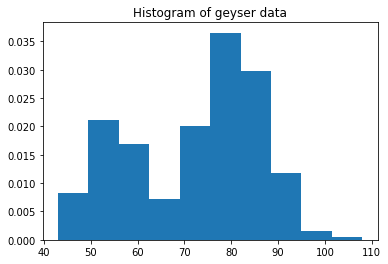

In [4]:
plt.hist(mat2, density=1)
plt.title("Histogram of geyser data")
plt.show()

# Question (b) <br> Assume a normal distribution, and estimate the mean and standard deviation.

MLE of Normal distribution is

\begin{align}
\mu_{mle} & = \frac{1}{n}\sum_{j=1}^{n}x_j\\
\sigma_{mle}^{2} & = \frac{1}{n}\sum_{j=1}^{n} (x_j-\mu_{mle})^{2} \\
\end{align}

In [5]:
mle_mean = sum(mat2)/len(mat2)
mle_std  = np.sqrt(sum((mat2-mle_mean)**2)/len(mat2))

In [6]:
print("estimated mean = %f"%(mle_mean))
print("estimated standard deviation = %f"%(mle_std))

estimated mean = 72.314381
estimated standard deviation = 13.867077


# Question (c) <br> Gabsoon modelled the data as coming from a normal mixture. Use the EM algorithm and estimate params.

In [7]:
w0 = 0.5

mu1 = 40
sgm1 = 1
mu2 = 70
sgm2 = 1

In [8]:
list_save = [[0,0,0,0,0]]
step=0
while True:
    step+=1

    density1 = w0*stats.norm.pdf(mat2,mu1,sgm1)
    density2 = (1-w0)*stats.norm.pdf(mat2,mu2,sgm2)
    density = density1+density2
    prob1 = density1/density
    prob2 = 1-prob1

    w0 = sum(prob1)/mat2.shape[0]
    mu1 = sum(prob1*mat2)/sum(prob1)
    mu2 = sum(prob2*mat2)/sum(prob2)
    sgm1 = np.sqrt(sum(prob1*(mat2-mu1)**2)/sum(prob1))
    sgm2 = np.sqrt(sum(prob2*(mat2-mu2)**2)/sum(prob2))
    
    print("step=%d, w0=%f, mu1=%0.2f, sigma1=%0.2f, mu2=%0.2f, sigma2=%0.2f"%(step, w0,np.round(mu1,2),np.round(sgm1,2),np.round(mu2,2),np.round(sgm2,2)))

    save1 = [w0,mu1,sgm1,mu2,sgm2]
   
    if sum(np.array(save1)-np.array(list_save[-1]))<0.001: # prevent infinite loop
        break
    else:  
        list_save.append(save1)
        continue

step=1, w0=0.185619, mu1=50.80, sigma1=2.52, mu2=77.22, sigma2=10.25
step=2, w0=0.187226, mu1=51.22, sigma1=2.83, mu2=77.17, sigma2=10.42
step=3, w0=0.196532, mu1=51.52, sigma1=3.08, mu2=77.40, sigma2=10.27
step=4, w0=0.208542, mu1=51.81, sigma1=3.30, mu2=77.72, sigma2=10.00
step=5, w0=0.221451, mu1=52.09, sigma1=3.50, mu2=78.07, sigma2=9.70
step=6, w0=0.234318, mu1=52.37, sigma1=3.70, mu2=78.42, sigma2=9.38
step=7, w0=0.246573, mu1=52.64, sigma1=3.88, mu2=78.75, sigma2=9.07
step=8, w0=0.257808, mu1=52.90, sigma1=4.04, mu2=79.06, sigma2=8.77
step=9, w0=0.267723, mu1=53.13, sigma1=4.19, mu2=79.33, sigma2=8.51
step=10, w0=0.276141, mu1=53.34, sigma1=4.33, mu2=79.55, sigma2=8.29
step=11, w0=0.283048, mu1=53.51, sigma1=4.44, mu2=79.74, sigma2=8.11
step=12, w0=0.288570, mu1=53.66, sigma1=4.55, mu2=79.88, sigma2=7.97
step=13, w0=0.292912, mu1=53.78, sigma1=4.63, mu2=79.99, sigma2=7.86
step=14, w0=0.296292, mu1=53.87, sigma1=4.70, mu2=80.08, sigma2=7.77
step=15, w0=0.298909, mu1=53.95, sigma1

## result

In [9]:
print("step=%d, w0=%f, mu1=%0.2f, sigma1=%0.2f, mu2=%0.2f, sigma2=%0.2f"%(step, w0,np.round(mu1,2),np.round(sgm1,2),np.round(mu2,2),np.round(sgm2,2)))

step=34, w0=0.307541, mu1=54.20, sigma1=4.95, mu2=80.36, sigma2=7.51


# Question (d) <br> Which one is better, a normal distribution or a normal mixture distribution? Can you give a clear criterion?

## Likelihood of a Normal distribution

In [66]:
part1 = -(n1*0.5)*np.log(2*np.pi)-(n1*0.5)*np.log(mle_std**2)
part2 = -1/(2*(mle_std**2))
part3 = sum((mat2-mle_mean)**2)

result1 = part1+part2*part3

In [67]:
print("Log likelihood of a normal distribution: %f"%(result1))

Log likelihood of a normal distribution: -1210.488336


## Likelihood of a Normal Mixture distribution

In [68]:
part1_mix = w0*stats.norm.pdf(mat2,mu1,sgm1)
part2_mix = (1-w0)*stats.norm.pdf(mat2,mu2,sgm2)

result2 = sum(np.log(part1_mix+part2_mix))

In [69]:
print("Log likelihood of a normal mixture distribution: %f"%(result2))

Log likelihood of a normal mixture distribution: -1157.542021


-1157.542021 > -1210.488336<br>
Log likelihood of a normal mixture distribution > Log likelihood of a normal distribution<br>

We can know that Normal Mixture Distribution is better model.

## plot

In [103]:
axis_x = np.arange(40,110)

In [104]:
rnorm = stats.norm.pdf(axis_x,mle_mean,mle_std)

In [105]:
density1 = w0*stats.norm.pdf(axis_x,mu1,sgm1)
density2 = (1-w0)*stats.norm.pdf(axis_x,mu2,sgm2)
density = density1+density2

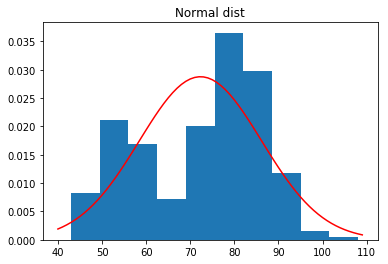

In [107]:
plt.hist(mat2, density=1)
plt.plot(axis_x, rnorm, 'r')
plt.title("Normal dist")
plt.show()

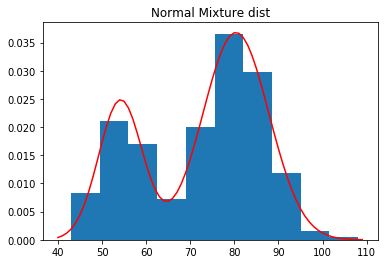

In [100]:
plt.hist(mat2, density=1)
plt.plot(axis_x, density, 'r')
plt.title("Normal Mixture dist")
plt.show()

We can also know that normal mixture distribution is better from the histogram above.